# **Assignment 2 For Clustering Data Analytics**
<hr>

**Submitted by:** Jude M. Ando & Niles Vincent Gabrielle Rondez <br>
**Course & Year:** BSCS - 2 <br>
**Schedule:** M W 10:30 AM - 12:00 PM <br>
<hr>

## Introduction
This notebook implements the Sessa Empirical Estimator for medication adherence analysis. It uses K-Means and DBSCAN clustering algorithms to analyze simulated patient data.

## Convert SEE.R Codes into Python Codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

def preprocess_data(df, atc_code):
    df = df[df['ATC'] == atc_code].copy()
    df = df.sort_values(by=['pnr', 'eksd'])
    df['prev_eksd'] = df.groupby('pnr')['eksd'].shift(1)
    df = df.dropna()
    df['event_interval'] = (df['eksd'] - df['prev_eksd']).dt.days
    return df

def empirical_cdf(df):
    ecdf = np.sort(df['event_interval'].values)
    y_vals = np.arange(1, len(ecdf) + 1) / len(ecdf)
    return ecdf, y_vals

def plot_ecdf(df):
    ecdf, y_vals = empirical_cdf(df)
    plt.figure(figsize=(10, 5))
    plt.plot(ecdf, y_vals, marker='.', linestyle='none', label='ECDF')
    plt.xlabel('Event Interval (Days)')
    plt.ylabel('ECDF')
    plt.title('Empirical CDF of Event Intervals')
    plt.legend()
    plt.show()

def determine_clusters(df):
    data = np.log(df[['event_interval']].values)
    data = StandardScaler().fit_transform(data)
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    optimal_k = np.argmax(np.diff(inertia)) + 2  # Heuristic for optimal clusters
    return optimal_k

def kmeans_clustering(df, n_clusters):
    data = np.log(df[['event_interval']].values)
    data = StandardScaler().fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(data)
    return df

def visualize_clusters(df):
    sns.boxplot(x='cluster', y='event_interval', data=df)
    plt.title('Clustering of Event Intervals')
    plt.show()

def sessa_empirical_estimator(df, atc_code):
    df = preprocess_data(df, atc_code)
    plot_ecdf(df)
    n_clusters = determine_clusters(df)
    df = kmeans_clustering(df, n_clusters)
    visualize_clusters(df)
    return df
# Example usage (data needs to be loaded first)
# df = pd.read_csv("your_data.csv")
# df['eksd'] = pd.to_datetime(df['eksd'])
# result = sessa_empirical_estimator(df, "medA")


## Step 1: Simulate Medication Data
We simulate patient medication data using the `simulate_med_data` function. The dataset includes patient IDs, dates, doses, and drug types.

In [1]:
# Import modules
from data_simulation import load_med_events
from metrics import calculate_adherence
from clustering import cluster_kmeans, cluster_dbscan
from analysis import compare_clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the med.events dataset
raw_df = pd.read_csv("med_events.csv")

# Convert DATE column to datetime
raw_df['DATE'] = pd.to_datetime(raw_df['DATE'], format='%m/%d/%Y')

print("Med.Events Data Sample:")
print(raw_df.head())
print(raw_df.dtypes)

Med.Events Data Sample:
   PATIENT_ID       DATE  PERDAY CATEGORY  DURATION
0           1 2033-04-26       4     medA        50
1           1 2033-07-04       4     medB        30
2           1 2033-08-03       4     medB        30
3           1 2033-08-17       4     medB        30
4           1 2033-10-13       4     medB        30
PATIENT_ID             int64
DATE          datetime64[ns]
PERDAY                 int64
CATEGORY              object
DURATION               int64
dtype: object


## Step 2: Calculate Adherence Metrics
We calculate adherence metrics such as total doses, average gap between doses, and regimen complexity for each patient.

In [3]:
# Calculate adherence metrics
adherence_df = calculate_adherence(raw_df)
print("\nAdherence Metrics:")
print(adherence_df.head())


Adherence Metrics:
   index  total_doses     avg_gap  regimen_complexity
0      1         24.0   30.608696                 2.0
1      2          8.0   67.714286                 2.0
2      3         28.0   26.259259                 2.0
3      4          6.0  140.600000                 2.0
4      5          8.0   68.571429                 2.0


## Step 3: Perform Sessa Empircal Estimator with K-Means Clustering Algorithm on Medication Adherence Analysis
We apply K-Means clustering to the adherence metrics to identify patterns in patient behavior.

In [4]:
# Perform clustering
kmeans_results = cluster_kmeans(adherence_df[['avg_gap', 'total_doses']])

### Insights

Insights here

## Step 4: Substitute Sessa Empircal Estimator with DBSCAN Clustering Algorithms on Medication Adherence Analysis
We apply DBSCAN clustering to the adherence metrics to identify patterns in patient behavior.

In [5]:
# Perform clustering
dbscan_results = cluster_dbscan(adherence_df[['avg_gap', 'total_doses']])

### Insights

Insights here

## Step 5: Compare Between Sessa Empirical Estimator using K-Means, and Sessa Empirical Estimator using DBSCAN
We compare the clustering results from K-Means and DBSCAN and generate insights about patient adherence patterns.

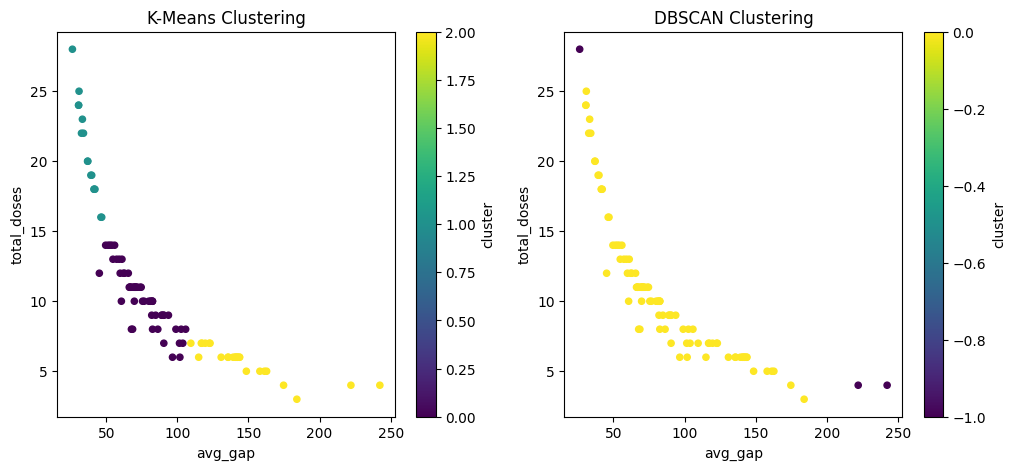

K-Means Cluster Stats:
        avg_gap                                                        \
          count        mean        std         min         25%    50%   
cluster                                                                 
0          58.0   74.775625  15.160275   45.181818   65.709091   71.1   
1          16.0   36.852453   5.991315   26.259259   32.193452   37.0   
2          26.0  146.682051  31.187578  109.500000  124.950000  141.2   

                                total_doses                                   \
                75%         max       count       mean       std   min   25%   
cluster                                                                        
0         84.205357  105.857143        58.0  10.327586  2.046717   6.0   9.0   
1         41.455882   46.866667        16.0  20.750000  3.415650  16.0  18.0   
2        155.625000  242.333333        26.0   5.730769  1.079173   3.0   5.0   

                            
          50%    75%   max  

In [6]:
# Compare results
compare_clusters(kmeans_results, dbscan_results)

text maybe?